[*********************100%***********************]  1 of 1 completed


ADF Statistic: -0.8385115415246777
p-value: 0.8075470938745424

ADF Statistic after differencing: -9.390451415214338
p-value after differencing: 6.58278060865391e-16
                               SARIMAX Results                                
Dep. Variable:                   TSLA   No. Observations:                 2718
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9138.234
Date:                Wed, 22 Oct 2025   AIC                          18282.468
Time:                        17:09:10   BIC                          18300.190
Sample:                             0   HQIC                         18288.875
                               - 2718                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5125      0.334     -1.533 

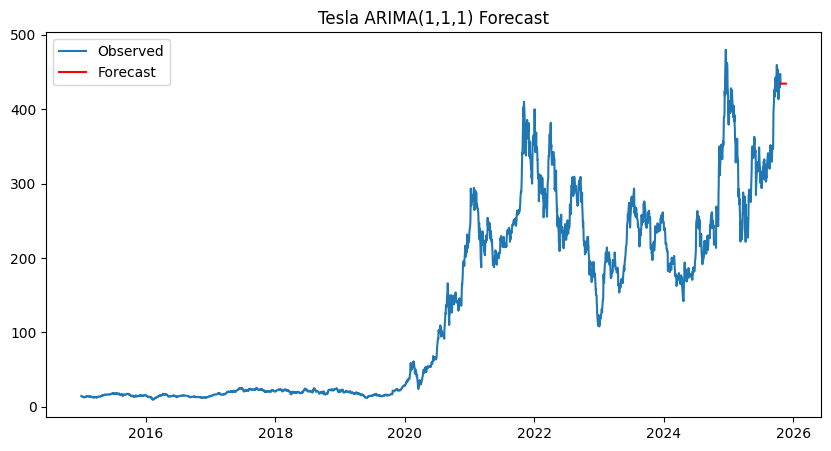

In [ ]:
# --- Step 1: Import dependencies ---
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# --- Step 2: Get TSLA data ---
ticker = "TSLA"
start_date = "2015-01-01"
end_date = "2025-12-31"

tsla = yf.download(ticker, start=start_date, end=end_date, auto_adjust=False)
tsla.reset_index(inplace=True)
tsla = tsla[['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']]
tsla.rename(columns={'Adj Close': 'Adj_Close'}, inplace=True)

# --- Step 3: Check for stationarity ---
adf_result = adfuller(tsla['Adj_Close'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

# --- Step 4: If non-stationary, difference once ---
tsla['Diff_Close'] = tsla['Adj_Close'].diff()
adf_result_diff = adfuller(tsla['Diff_Close'].dropna())
print('\nADF Statistic after differencing:', adf_result_diff[0])
print('p-value after differencing:', adf_result_diff[1])

# --- Step 5: Fit ARIMA(1,1,1) model ---
model = ARIMA(tsla['Adj_Close'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

# --- Step 6: Forecast next 30 days ---
forecast = model_fit.forecast(steps=30)
plt.figure(figsize=(10,5))
plt.plot(tsla['Date'], tsla['Adj_Close'], label='Observed')
plt.plot(pd.date_range(tsla['Date'].iloc[-1], periods=31, freq='D')[1:], forecast, label='Forecast', color='red')
plt.title('Tesla ARIMA(1,1,1) Forecast')
plt.legend()
plt.show()


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from pmdarima import auto_arima


auto_model = auto_arima(tsla['Adj_Close'], seasonal=False, stepwise=True, trace=True)
print(auto_model.summary())



/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=18265.856, Time=8.95 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18281.166, Time=0.11 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18281.941, Time=0.22 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18281.980, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18280.493, Time=0.11 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=18284.843, Time=1.90 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=18285.427, Time=2.48 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=18270.437, Time=5.99 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=18288.602, Time=1.48 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18283.038, Time=1.90 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=18286.602, Time=2.51 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=18286.582, Time=0.84 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=18279.593, Time=7.42 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=18276.419, Time=3.53 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 37.921 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2718
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -9126.928
Date:                Wed, 22 Oct 2025   AIC                          18265.856
Time:                        16:27:59   BIC                          18301.300
Sample:                             0   HQIC                         18278.670
                               - 2718                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6021      0.533      1.130      0.258      -0.44

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


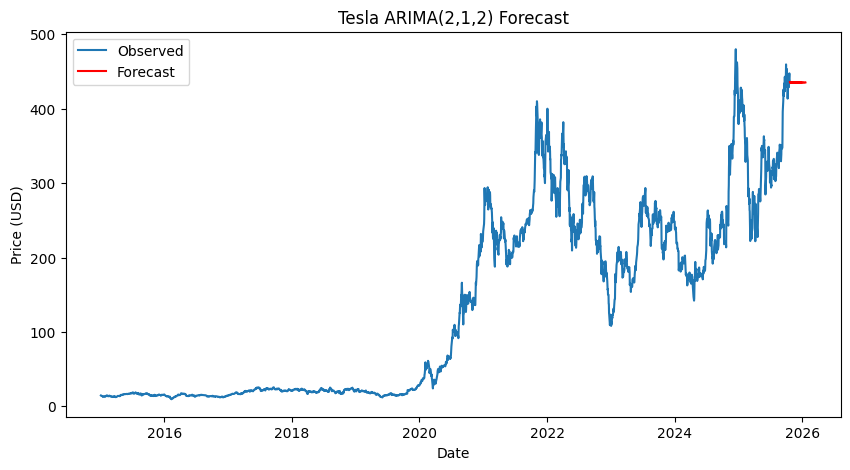

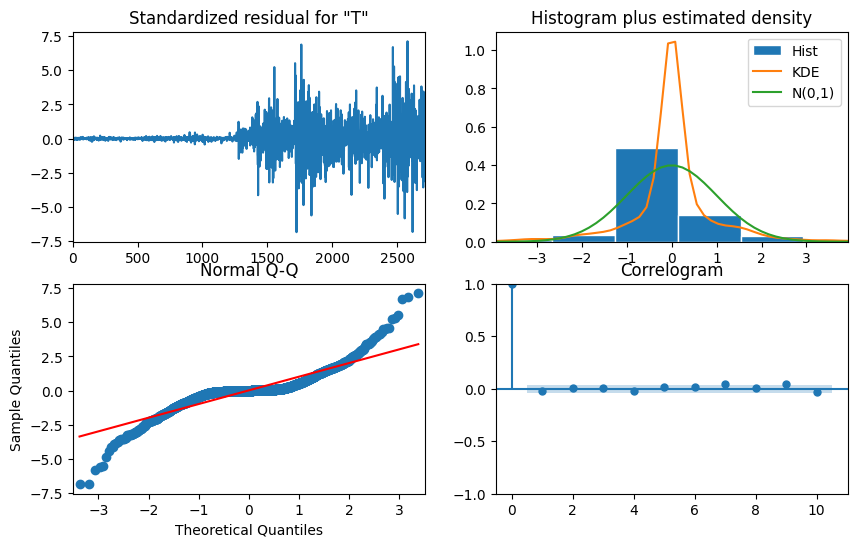

In [ ]:
# Refit ARIMA(2,1,2)
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

model = ARIMA(tsla['Adj_Close'], order=(2,1,2))
model_fit = model.fit()

# Forecast 60 days ahead
forecast = model_fit.forecast(steps=90)

# Plot forecast
plt.figure(figsize=(10,5))
plt.plot(tsla['Date'], tsla['Adj_Close'], label='Observed')
plt.plot(pd.date_range(tsla['Date'].iloc[-1], periods=91, freq='D')[1:], forecast, color='red', label='Forecast')
plt.title('Tesla ARIMA(2,1,2) Forecast')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()
model_fit.plot_diagnostics(figsize=(10,6))
plt.show()

In [ ]:
print("TSLA columns:", tsla.columns.tolist())
print("Events columns:", events.columns.tolist())


TSLA columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj_Close', 'DiffClose', 'Event', 'Category', 'Description', 'Source', 'EventIntensityx', 'EventIntensityy', 'Event_Intensity_x', 'Event_Intensity_y']
Events columns: ['Date', 'Event', 'Category', 'Description', 'Source', 'Event_Intensity']


In [ ]:
# --- 1️⃣ Clean and normalize column names ---
tsla = tsla.copy()
events = events.copy()

# Convert all column names to lowercase and remove underscores/spaces
tsla.columns = tsla.columns.str.lower().str.replace(' ', '').str.replace('_', '')
events.columns = events.columns.str.lower().str.replace(' ', '').str.replace('_', '')

# Drop any duplicate columns that snuck in
tsla = tsla.loc[:, ~tsla.columns.duplicated()]

print("✅ Cleaned TSLA columns:", tsla.columns.tolist())
print("✅ Cleaned EVENTS columns:", events.columns.tolist())

# --- 2️⃣ Create weighted event intensity ---
weights = {
    'tweet': 1,
    'productlaunch': 3,
    'milestone': 3,
    'legal': -2,
    'controversy': -2,
    'companynews': 2,
    'partnership': 2,
    'technology': 2
}

events['eventintensity'] = events['category'].str.lower().map(weights).fillna(1)

# --- 3️⃣ Merge cleanly on 'date' ---
tsla = tsla.merge(events[['date', 'eventintensity']], on='date', how='left')
tsla['eventintensity'] = tsla['eventintensity'].fillna(0)

print("\n✅ Final TSLA columns after merge:", tsla.columns.tolist())
print(tsla[['date', 'adjclose', 'eventintensity']].head())

# --- 4️⃣ Fit ARIMAX model ---
from statsmodels.tsa.arima.model import ARIMA

X = tsla[['eventintensity']]
y = tsla['adjclose']

model_arimax_weighted = ARIMA(y, order=(2, 1, 2), exog=X)
model_arimax_weighted_fit = model_arimax_weighted.fit()
print(model_arimax_weighted_fit.summary())


✅ Cleaned TSLA columns: ['date', 'open', 'high', 'low', 'close', 'volume', 'adjclose', 'diffclose', 'event', 'category', 'description', 'source', 'eventintensityx', 'eventintensityy']
✅ Cleaned EVENTS columns: ['date', 'event', 'category', 'description', 'source', 'eventintensity']

✅ Final TSLA columns after merge: ['date', 'open', 'high', 'low', 'close', 'volume', 'adjclose', 'diffclose', 'event', 'category', 'description', 'source', 'eventintensityx', 'eventintensityy', 'eventintensity']
        date   adjclose  eventintensity
0 2015-01-02  14.620667             0.0
1 2015-01-05  14.006000             0.0
2 2015-01-06  14.085333             0.0
3 2015-01-07  14.063333             0.0
4 2015-01-08  14.041333             0.0
                               SARIMAX Results                                
Dep. Variable:               adjclose   No. Observations:                 2718
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -9137.801
Date:                Wed, 2